In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import quantecon as qe

In [2]:
# Parameters
a0 = 10.0
a1 = 2.0
β = 0.96
γ = 12.0

# In LQ form
A = np.eye(3)
B1 = np.array([[0.], [1.], [0.]])
B2 = np.array([[0.], [0.], [1.]])


R1 = [[      0.,     -a0 / 2,          0.],
      [-a0 / 2.,          a1,     a1 / 2.],
      [       0,     a1 / 2.,          0.]]

R2 = [[     0.,           0.,      -a0 / 2],
      [     0.,           0.,      a1 / 2.],
      [-a0 / 2,      a1 / 2.,           a1]]

Q1 = Q2 = γ
S1 = S2 = W1 = W2 = M1 = M2 = 0.0

# Solve using QE's nnash function
F1, F2, P1, P2 = qe.nnash(A, B1, B2, R1, R2, Q1, 
                          Q2, S1, S2, W1, W2, M1, 
                          M2, beta=β)

# Display policies
print("Computed policies for firm 1 and firm 2:\n")
print(f"F1 = {F1}")
print(f"F2 = {F2}")
print("\n")

Computed policies for firm 1 and firm 2:

F1 = [[-0.66846615  0.29512482  0.07584666]]
F2 = [[-0.66846615  0.07584666  0.29512482]]




In [3]:
Λ1 = A - B2 @ F2
lq1 = qe.LQ(Q1, R1, Λ1, B1, beta=β)
P1_ih, F1_ih, d = lq1.stationary_values()
F1_ih

array([[-0.66846613,  0.29512482,  0.07584666]])

In [4]:
np.allclose(F1, F1_ih)

True

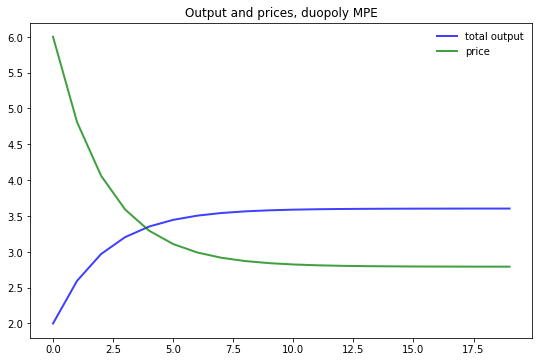

In [5]:
AF = A - B1 @ F1 - B2 @ F2
n = 20
x = np.empty((3, n))
x[:, 0] = 1, 1, 1
for t in range(n-1):
    x[:, t+1] = AF @ x[:, t]
q1 = x[1, :]
q2 = x[2, :]
q = q1 + q2       # Total output, MPE
p = a0 - a1 * q   # Price, MPE

fig, ax = plt.subplots(figsize=(9, 5.8))
ax.plot(q, 'b-', lw=2, alpha=0.75, label='total output')
ax.plot(p, 'g-', lw=2, alpha=0.75, label='price')
ax.set_title('Output and prices, duopoly MPE')
ax.legend(frameon=False)
plt.show()